# Imports and Datasets

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [48]:
filename= r'C:\Users\aleys\Downloads\StudentsPerformance.csv'
df=pd.read_csv(filename)

In [49]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
#Rename columns
df.columns = ['gender', 'ethnic', 'parentEdu', 'lunch', 'coursePrep', 'math', 'reading', 'writing']

In [51]:
#Veri setinde Null data bulunmuyor.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      1000 non-null   object
 1   ethnic      1000 non-null   object
 2   parentEdu   1000 non-null   object
 3   lunch       1000 non-null   object
 4   coursePrep  1000 non-null   object
 5   math        1000 non-null   int64 
 6   reading     1000 non-null   int64 
 7   writing     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# EDA

📌Erkek ve Kadın eşit olarak dağılmıştır. <br /> 
📌Köken olarak C Grubu çoğunlukta, A Grubu ise azınlıkta. <br /> 
📌Ebeveynlerin çoğu eğitimli. <br /> 
📌Öğrencilerin çoğu Standart Öğle Yemeği tüketir. <br /> 
📌Öğrencilerin çoğu sınava hazırlanmadı.

In [53]:
#Bar kullanarak her kategorik kutudaki gözlem sayısı.
#Eşit dağılım gösteren özelliği modelimde kullanmayı amaçlıyorum. (Gender)

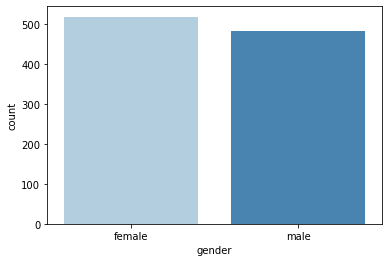

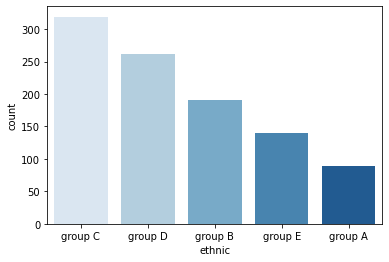

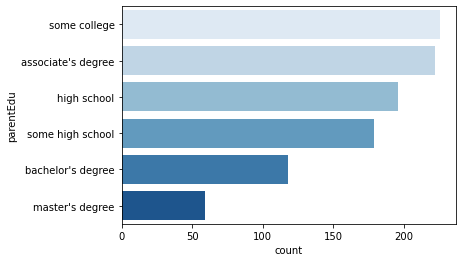

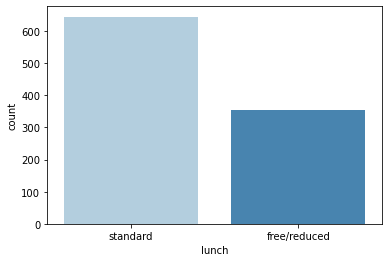

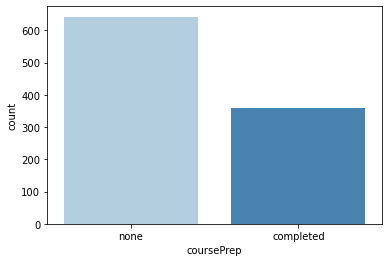

In [54]:
subCols=['gender', 'ethnic', 'parentEdu', 'lunch', 'coursePrep']

for i in subCols:
    if i == 'parentEdu':
        sns.countplot(y=i,data=df,order=df[i].value_counts().index,palette = "Blues")
    else:
        sns.countplot(x=i,data=df,order=df[i].value_counts().index,palette = "Blues")
    plt.show()


Korelasyon <br /> 
📌Matematikten daha fazla puan almak için yazma becerisine kıyasla daha iyi okuma becerisine ihtiyaç var.<br /> 
📌Okuma puanı ve Yazma puanı yüksek oranda ilişkilidir.<br /> 
📌İyi bir skor için yüksek düzeyde ilişkili konulara daha fazla odaklanmalı.

<AxesSubplot:>

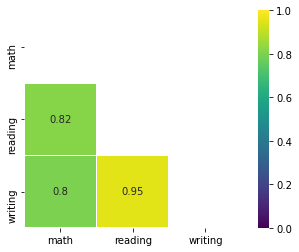

In [55]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask,square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis' )


In [56]:
#Skorların korelesi birbirine yakın olduğu için total oluştuyorum.
#Total score ve yüzdesi

In [57]:
df['total'] = df['math'] + df['reading'] + df['writing']
df['percentage'] = df['total']*100.0 / 300
df.sample()

,gender,ethnic,parentEdu,lunch,coursePrep,math,reading,writing,total,percentage
374,female,group D,bachelor's degree,standard,none,59,70,73,202,67.333


In [58]:
#Cinsiyete göre veriyi incelemek


📌Genel olarak kız öğrenciler erkek öğrencilerden daha yüksek puan aldı.<br /> 
📌Ebeveyn eğitim düzeyi öğrenci puanlarına orantılıdır.<br /> 
📌Standart öğle yemeği alan öğrenciler daha yüksek puan aldı.<br /> 
📌Sınava hazırlanan öğrenciler daha yüksek puan aldı.

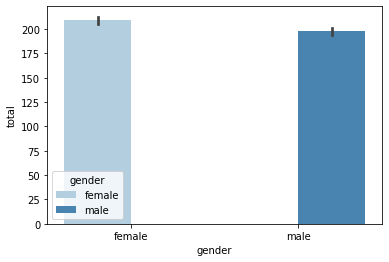

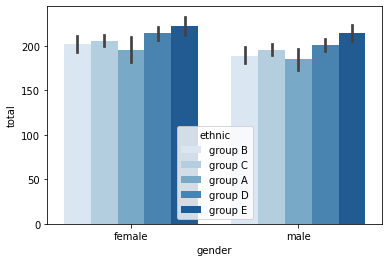

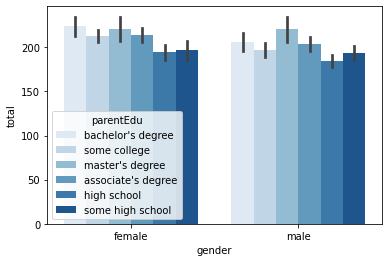

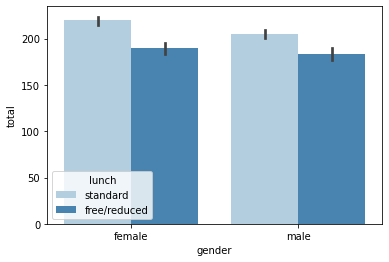

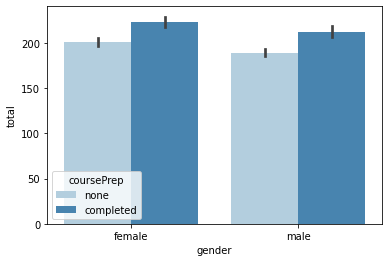

In [59]:
for i in subCols:
 sns.barplot(x='gender', y='total', hue=i, data=df,palette = "Blues")
 plt.show()

In [60]:
#Skorları kategorik hale getirebilmeyi amaçlıyorum.Veriyi bir de bu şekilde inceleyeceğim.

In [61]:
def ScoreMark(score):
    if ( score > 90 ):
        mark = 'A'
    elif ( score > 80):
        mark = 'B'
    elif ( score > 70):
        mark = 'C'
    elif ( score > 60):
        mark = 'D'
    elif ( score > 50):
        mark = 'E'
    else: 
        mark = 'F'
    return mark

df['mathMark'] = df['math'].apply(lambda s: ScoreMark(s))
df['readingMark'] = df['reading'].apply(lambda s: ScoreMark(s))
df['writingMark'] = df['writing'].apply(lambda s: ScoreMark(s))
df['percentageMark'] = df['percentage'].apply(lambda s: ScoreMark(s))

In [62]:
df_model = df.drop(['math','reading','writing','total','percentage'],axis=1)
df_model

,gender,ethnic,parentEdu,lunch,coursePrep,mathMark,readingMark,writingMark,percentageMark
0,female,group B,bachelor's degree,standard,none,C,C,C,C
1,female,group C,some college,standard,completed,D,B,B,B
2,female,group B,master's degree,standard,none,B,A,A,A
3,male,group A,associate's degree,free/reduced,none,F,E,F,F
4,male,group C,some college,standard,none,C,C,C,C
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,B,A,A,A
996,male,group C,high school,free/reduced,none,D,E,E,E
997,female,group C,high school,free/reduced,completed,E,C,D,D
998,female,group D,some college,standard,completed,D,C,C,C


In [63]:
categ2 = ['parentEdu','lunch','coursePrep']
df_model2 = df.drop(['mathMark','readingMark','writingMark','total','percentageMark'],axis=1)
df_model2[categ2] =df_model[categ2].apply(labelencoder.fit_transform)
df_model2['gender'] = df_model.gender.replace({'female':0, "male":1})
df_model2['ethnic'] = pd.get_dummies(df_model2.ethnic, drop_first=True)
df_model2

,gender,ethnic,parentEdu,lunch,coursePrep,math,reading,writing,percentage
0,0,1,1,1,1,72,72,74,72.667
1,0,0,4,1,0,69,90,88,82.333
2,0,1,3,1,1,90,95,93,92.667
3,1,0,0,0,1,47,57,44,49.333
4,1,0,4,1,1,76,78,75,76.333
...,...,...,...,...,...,...,...,...,...
995,0,0,3,1,0,88,99,95,94.000
996,1,0,2,0,1,62,55,55,57.333
997,0,0,2,0,0,59,71,65,65.000
998,0,0,4,1,0,68,78,77,74.333


Skorlar için:<br>
df_model = Kategorik DF <br>
df_model2= Sürekli DF


# Label ve One-Hot Encoding 

In [64]:
labelencoder = LabelEncoder()
categ = ['parentEdu','lunch','coursePrep','mathMark','readingMark','writingMark','percentageMark']

df_model[categ] =df_model[categ].apply(labelencoder.fit_transform)

df_model['ethnic'] = pd.get_dummies(df_model.ethnic, drop_first=True)
df_model['gender'] = df_model.gender.replace({'female':0, "male":1})
df_model

,gender,ethnic,parentEdu,lunch,coursePrep,mathMark,readingMark,writingMark,percentageMark
0,0,1,1,1,1,2,2,2,2
1,0,0,4,1,0,3,1,1,1
2,0,1,3,1,1,1,0,0,0
3,1,0,0,0,1,5,4,5,5
4,1,0,4,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...
995,0,0,3,1,0,1,0,0,0
996,1,0,2,0,1,3,4,4,4
997,0,0,2,0,0,4,2,3,3
998,0,0,4,1,0,3,2,2,2


📌 gender ve reading etkili (reading direkt etkili) <br>
📌 edu ve course prep etkili değil <br>
📌 Bu nedenle hedef değişkenim skor yüzdesi, değişkenler de cinsiyet ve okuma skoru olacaktır.<br>
📌 Okuma skoru üzerinde matematik skorunun etkisi de vardı ve matematik skoru ile total skor da pozitif olarak doğrusal

# Linear Regresyon

In [65]:
y = df_model2['percentage']
x = df_model2[['gender','reading']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 800
Test kümesindeki gözlem sayısı   : 200


In [66]:
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

Değişkenler: 
 [3.21225103 0.97028582]
Sabit değer (bias): 
 -0.9143075100233489


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     7768.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:36:56   Log-Likelihood:                -2055.5
No. Observations:                 800   AIC:                             4117.
Df Residuals:                     797   BIC:                             4131.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9143      0.592     -1.545      0.123      -2.076       0.248
gender         3.2123      0.232     13.857      0.000       2.757       3.667
reading        0.9703      0.008    123.321      0.000       0.955       0.986
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.371
Skew:                           0.037   Prob(JB):                        0.831
Kurtosis:                       2.925   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ortalama Mutlak Hata= %6 <br>
Overfitting

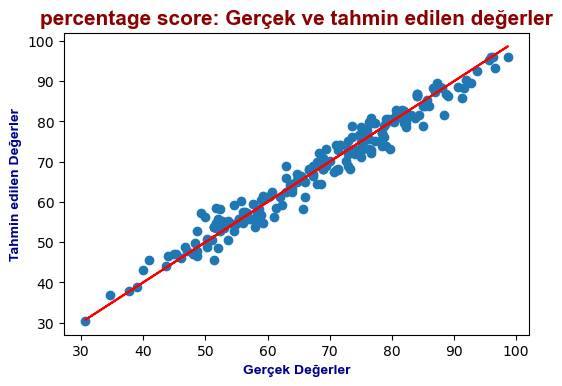

Ortalama Mutlak Hata (MAE)        : 2.132039030673215
Ortalama Kare Hata (MSE)          : 7.263821148960277
Kök Ortalama Kare Hata (RMSE)     : 2.695147704479344
Ortalama Mutlak Yüzde Hata (MAPE) : 3.26579492839338


In [67]:
#Doğrusal regresyon modelini kullanarak tahmin 
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("percentage score: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

📌Overfittingi azaltmanın yollarından bir tanesi Lasso. <br>
📌Genel olarak amaç, sadece eğitim kümesi için değil karşılaşılabilecek tüm veriler hakkında bize bilgi veren bir model çıkarmaktır.<br>
📌 R-kare değeri daha makul bir seviyeye indi.(5-7 arası)

In [196]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=100) #alpha ile oynayınca daha iyi sonuç verdi
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.7135495139282615
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7081950619417173
Ortalama Mutlak Hata (MAE)        : 6.2462493012755855
Ortalama Kare Hata (MSE)          : 57.3769921800302
Kök Ortalama Kare Hata (RMSE)     : 7.5747602061075305
Ortalama Mutlak Yüzde Hata (MAPE) : 9.972149034333539


# Lojistik Regresyon

Sınıflandırmada ki temel amaç ise gözlemin sınıf etiketini (class label) tahmin etmek, daha önceden belirlenmiş sınıf etiketlerine uygun olarak, gözlemin yer alacağı sınıfı belirlemektir. <br>
Lojistik regresyon lineer sınıflandırma yöntemlerinden biridir.<br>
Lineer sınıflandırma sınıfların belirli bir lineer ayrım çizgisi ile ayrılabildiği sınıflandırma tipi.

In [43]:
y = df_model['percentageMark']
#x = df_model.drop(['percentageMark'], axis  = 1)
x = df_model[['gender','readingMark']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0,stratify=y)

In [44]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
difference = abs(predictions - y_test)
difference.mean() #ortalamahata


0.345

📌lineer regresyon modelimde aynı parametrelerle aynı hedef değişken tahmini yarattıgım zaman yuzde 11 ortalama hata alırken lojistik regresyon bana yuzde 34 hata verdi çünkü sınıflandırma kullanınca puanları harf notuna çevirmiş oldum aralıklar daha belirsiz oldu. <br>
📌Bu df üzerine odaklanıp sonucu iyileştirmeye çalışacağım.


# KNN

KFold ile çapraz doğrulama : Her defasında test için seçilen kısım değişecek ve model toplamda K defa eğitilecektir. Her eğitim sonundaki modelin performans değerlerinin ortalaması modelimizin performansını verecektir.Bu yöntemle eğitimde ya da test aşamasına dahil edilmemiş veri kalmamaktadır.

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
y = df_model['percentageMark']
X = df_model[['gender','readingMark']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0,stratify=y)
knn.fit(X,y)
knn.score(X_test, y_test)
from sklearn.model_selection import cross_val_score
cvscores_3 = cross_val_score(knn, X_test, y_test, cv=3)
print('cv =  3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn, X_test, y_test, cv=20)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))

cv =  3 ---> Ortalama çarpraz doğrulama skoru :  0.6448062716719433
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.645


📌fit_transform(X) 'un önemi!!!!' <br>
📌doğruluk yuzde 21den yuzde 64 e çıktı.Az önce kategorik modelin sonuçları kötüiken şimdi düzeldi.

In [71]:
ss = StandardScaler()
X_olcekli = ss.fit_transform(X)
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y, test_size=0.2, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_olcekli,y_train)
knn.score(X_test_olcekli, y_test)

0.64

# Karar Ağaçları ile Regresyon

In [74]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

y = df_model['percentageMark']
X = df_model[['gender','readingMark']]

karar_agaci.fit(X, y)
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state = 0)

In [75]:
y_tahmin_ka = karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.69


In [55]:
print("For test data: \n")
pred = karar_agaci.predict(X_test)
print(pd.crosstab(y_test, pred, rownames = ['Actual'], colnames = ['Predictions']))
print("Test accuracy:", accuracy_score(y_test,pred))

print("\nFor training data: \n")
pred_train = karar_agaci.predict(X_eğitim)
print(pd.crosstab(y_eğitim, pred_train, rownames = ['Actual'], colnames = ['Predictions']))
print("Training accuracy:", accuracy_score(y_eğitim,pred_train))

For test data: 

Predictions  0   1   2   3   4   5
Actual                            
0            5   3   0   0   0   0
1            9  27   3   0   0   0
2            0   9  27   5   0   0
3            0   0  14  44   2   0
4            0   0   0   8  23   3
5            0   0   0   0   3  15
Test accuracy: 0.705

For training data: 

Predictions   0   1    2    3    4   5
Actual                                
0            28  14    0    0    0   0
1            10  89    6    0    0   0
2             0  41  159   12    0   0
3             0   0   43  137   20   0
4             0   0    0   31  106  13
5             0   0    0    1   24  66
Training accuracy: 0.73125


sınıflandırmada karar ağacı kullandıgım zaman doğruluk yüzde 70e kadar çıktı . şimdi lineer regresyonda overfitting olanı bir de random forestle deneyim dedim bakalım ne olucak ?

In [80]:
X = df_model2[['gender','reading']]
y = df_model2['percentage']

In [81]:

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
#Scale Data with StandardScaler

# Creating Model
rf = RandomForestRegressor(n_estimators=200)
# Training model
rf.fit(X_train, y_train)
#Predictions

predictions = rf.predict(X_test)
# Evaluating the Model
print('MAE: ', mean_absolute_error(y_test, predictions)) #lineer regresyonda : Ortalama Mutlak Hata (MAE): 2.132039030673215
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  2.6623176464784346
MSE:  11.500906911277738
RMSE:  3.3912987056992985


<AxesSubplot:xlabel='percentage', ylabel='Density'>

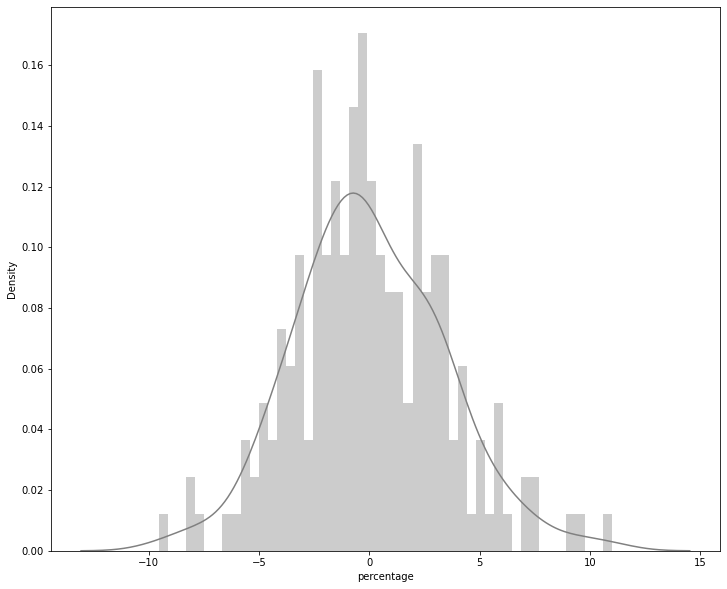

In [82]:
plt.figure(figsize=(12,10))
sns.distplot((y_test-predictions), bins = 50, color='gray')

# SVM

SVM için en iyi lineer ve rbg çıktı 0.740 ile 

In [83]:
from sklearn.svm import SVC
X = df_model[['gender','readingMark']]
y = df_model['percentageMark']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# kernel = linear
model_linear = SVC(kernel="linear")
model_linear.fit(X_train, y_train)
pred_test_linear = model_linear.predict(X_test)
pred_train_linear = model_linear.predict(X_train)

# kernel = poly
model_poly = SVC(kernel="poly")
model_poly.fit(X_train, y_train)
pred_test_poly = model_poly.predict(X_test)
pred_train_poly = model_poly.predict(X_train)

# kernel = sigmoid
model_sigmoid = SVC(kernel="sigmoid")
model_sigmoid.fit(X_train, y_train)
pred_test_sigmoid = model_sigmoid.predict(X_test)
pred_train_sigmoid = model_sigmoid.predict(X_train)

# kernel = rbf
model_rbf = SVC(kernel="rbf")
model_rbf.fit(X_train, y_train)
pred_test_rbf = model_rbf.predict(X_test)
pred_train_rbf = model_rbf.predict(X_train)

data = {"kernel":pd.Series(["linear","polynomial","sigmoid","rbf"]),"Test Accuracy":pd.Series([accuracy_score(y_test, pred_test_linear),accuracy_score(y_test, pred_test_poly),accuracy_score(y_test, pred_test_sigmoid),accuracy_score(y_test, pred_test_rbf)])}
table_acc=pd.DataFrame(data)
table_acc

,kernel,Test Accuracy
0,linear,0.740
1,polynomial,0.735
2,sigmoid,0.110
3,rbf,0.740


SVM için hiperparametreleri ayarlamayı deneyeceğiz. En iyi tahmin ediciyi bulmak için rastgele bir arama kullanacağız

Hesaplama süresini azaltırken hiperparametrelerin iyi bir tahminine sahip olmak için rastgele bir aramanın kullanıldığını unutmayın.

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_clf=SVC()
param_distributions = {"kernel":('linear','poly','rbf'), "gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=6.068623323784344, gamma=0.003414656793434257, kernel=linear; total time=   0.0s
[CV] END C=6.068623323784344, gamma=0.003414656793434257, kernel=linear; total time=   0.0s
[CV] END C=6.068623323784344, gamma=0.003414656793434257, kernel=linear; total time=   0.0s
[CV] END C=4.036818409241382, gamma=0.020926140198850012, kernel=poly; total time=   0.0s
[CV] END C=4.036818409241382, gamma=0.020926140198850012, kernel=poly; total time=   0.0s
[CV] END C=4.036818409241382, gamma=0.020926140198850012, kernel=poly; total time=   0.0s
[CV] END C=6.9586685937848, gamma=0.03775670213939859, kernel=poly; total time=   0.0s
[CV] END C=6.9586685937848, gamma=0.03775670213939859, kernel=poly; total time=   0.0s
[CV] END C=6.9586685937848, gamma=0.03775670213939859, kernel=poly; total time=   0.0s
[CV] END C=8.762963899999722, gamma=0.003963820835420244, kernel=linear; total time=   0.0s
[CV] END C=8.762963899999722, gamma=0.00

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A474148BB0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A4782DE670>,
                                        'kernel': ('linear', 'poly', 'rbf')},
                   verbose=2)

In [60]:
print("Best estimator: ",rnd_search_cv.best_estimator_)

predicted = rnd_search_cv.predict(X_test)
rnd_test_acc = accuracy_score(y_test,predicted)
print("test accuracy: ", rnd_test_acc)

predicted_train = rnd_search_cv.predict(X_train)
rnd_train_acc = accuracy_score(y_train,predicted_train)
print("train accuracy: ", rnd_train_acc)

Best estimator:  SVC(C=4.7066670621697995, gamma=0.015533336440879082)
test accuracy:  0.74
train accuracy:  0.7325


# BOOST

Şu ana kadar öğrendiğimiz makine öğrenimi metotlarında belirli bir algoritmayı kullanan modeller oluşturduk ve başarı durumuna göre en başarılı algoritmayı seçtik. Bu derste göreceğimiz Rastgele Orman algoritması ise birden fazla makine öğrenme modelini içermektedir. Rastgele Orman gibi, güçlü modeller oluşturmak için birden fazla makine öğrenimi algoritmasının kullanıldığı metotlara ensemble metotlar denmektedir. Bu şekilde bir çok metot bulunmaktadır ancak en çok öne çıkanlar Rastgele Orman ile boosting algoritmalarından olan XGBoost ve LightGBM'dir. 

The first 5 columns are categorical, the last 3 are continuous (but since we are predicting math score, we can just delete reading and writing).
Just do get_dummies for the categorical ones or OneHotEncoder if you are feeling spicy (probably better if you plan on deploying this model online with a pipeline).
So, we basically just have to figure out what the average is for the math score and then set the outcome to 0 or 1 depending on if the student is above average.
Also, there are no missing values, which is great as always.

In [85]:
import xgboost as xgb

In [86]:
df_modelxgb=df_model2
df_modelxgb

,gender,ethnic,parentEdu,lunch,coursePrep,math,reading,writing,percentage
0,0,1,1,1,1,72,72,74,72.667
1,0,0,4,1,0,69,90,88,82.333
2,0,1,3,1,1,90,95,93,92.667
3,1,0,0,0,1,47,57,44,49.333
4,1,0,4,1,1,76,78,75,76.333
...,...,...,...,...,...,...,...,...,...
995,0,0,3,1,0,88,99,95,94.000
996,1,0,2,0,1,62,55,55,57.333
997,0,0,2,0,0,59,71,65,65.000
998,0,0,4,1,0,68,78,77,74.333


In [87]:
train_vars = ['gender', 'reading']
train = df_modelxgb[train_vars]
train.head()

,gender,reading
0,0,72
1,0,90
2,0,95
3,1,57
4,1,78


In [88]:
df_modelxgb['percentage'].mean()

67.77066666666664

In [89]:
df_modelxgb['Outcome'] = 0
df_modelxgb.loc[df_modelxgb['percentage'] >= 67.770, 'Outcome'] = 1
df_modelxgb.head()

,gender,ethnic,parentEdu,lunch,coursePrep,math,reading,writing,percentage,Outcome
0,0,1,1,1,1,72,72,74,72.667,1
1,0,0,4,1,0,69,90,88,82.333,1
2,0,1,3,1,1,90,95,93,92.667,1
3,1,0,0,0,1,47,57,44,49.333,0
4,1,0,4,1,1,76,78,75,76.333,1


In [90]:
target = df_modelxgb.Outcome
target

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [91]:
train, test_train, target, test_target = train_test_split(train, target, test_size=0.2,random_state = 0)

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective = 'binary:logistic',
    seed = 1337
)
estimator

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, seed=1337, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [93]:
params = {"objective":"reg:logistic", "max_depth":3}
params

{'objective': 'reg:logistic', 'max_depth': 3}

In [94]:
model = XGBClassifier(params=params)
model.fit(train, target)
from sklearn.metrics import accuracy_score
prediction = model.predict(test_train)
prediction = [round(p) for p in prediction]


[15:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
accuracy = accuracy_score(prediction, test_target)
print(accuracy*100)

93.0


# KNN  Algoritmaları
Kümeleme algoritmalarının çoğu verilerin ölçeğine duyarlıdır. Bu nedenle, k-means'i uygulamadan önce değişkenlerimizi sklearn.preprocessing'den StandardScaler'ı kullanarak da standartlaştırıyoruz:

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

In [205]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df_model)

In [209]:
# Defining the k-means
kmeans_küme = KMeans(n_clusters=6, random_state = 0)

# Fit model
kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

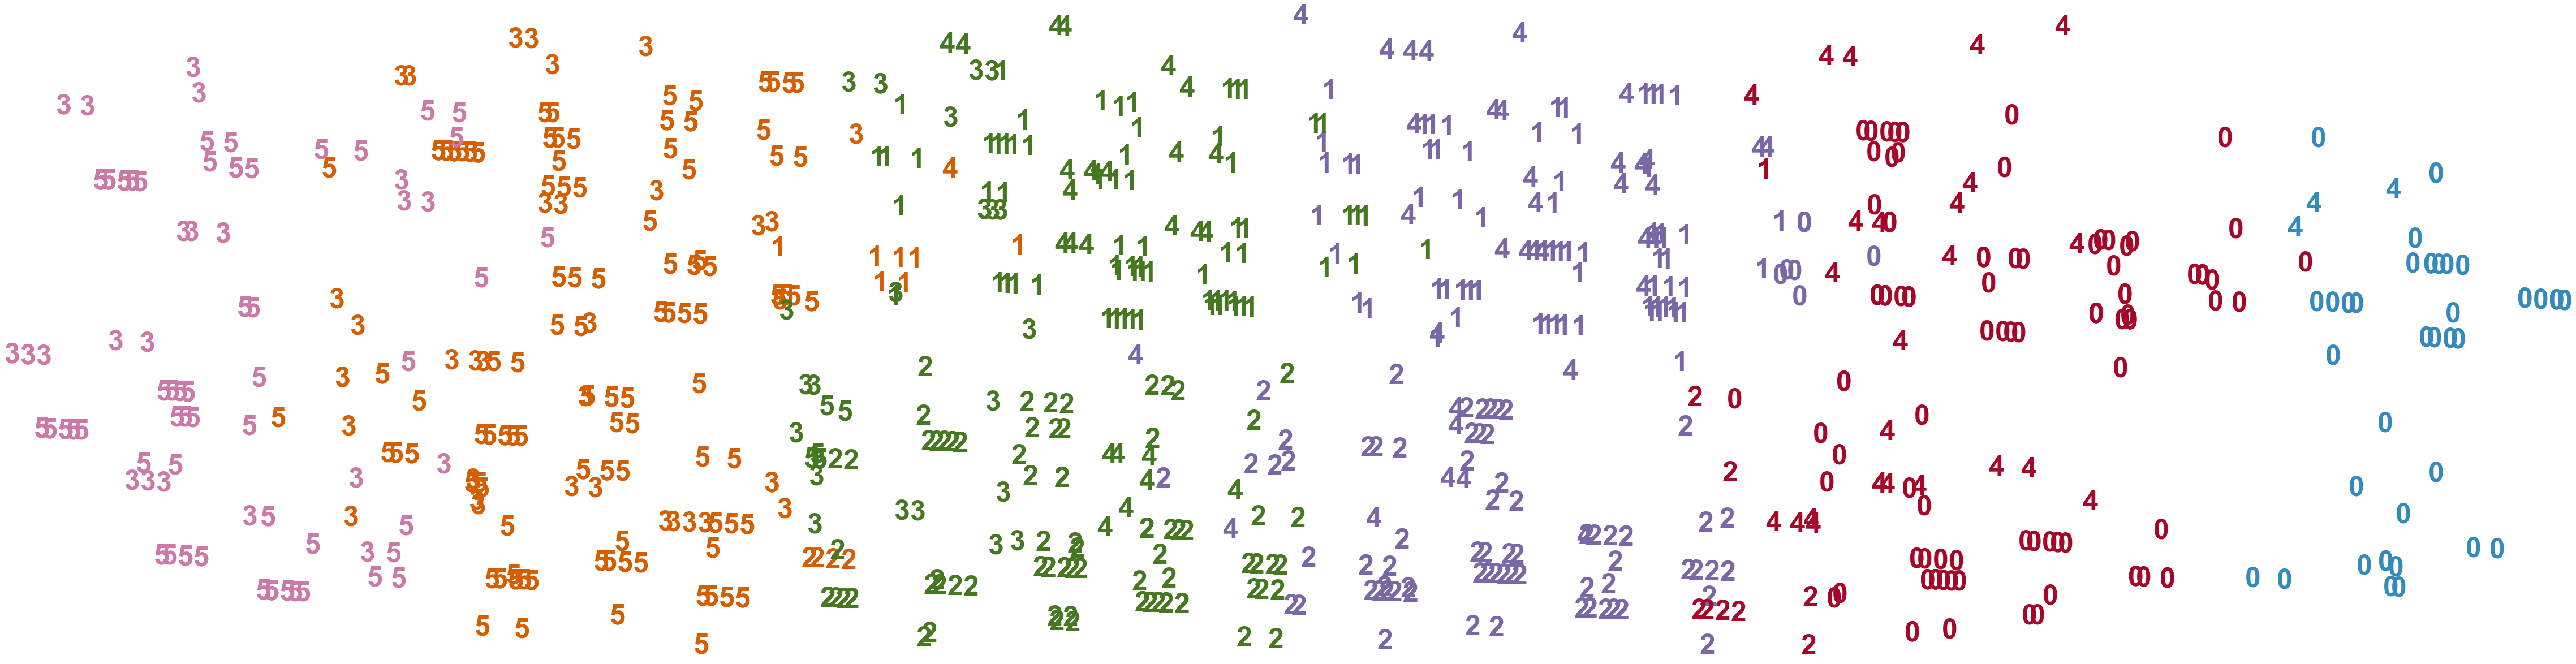

In [216]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = sns.color_palette()
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()